<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9797577	total: 94.7ms	remaining: 1m 34s
1:	learn: 0.9591203	total: 106ms	remaining: 52.8s
2:	learn: 0.9372531	total: 118ms	remaining: 39.3s
3:	learn: 0.9199589	total: 130ms	remaining: 32.4s
4:	learn: 0.9031113	total: 142ms	remaining: 28.2s
5:	learn: 0.8858878	total: 147ms	remaining: 24.4s
6:	learn: 0.8704819	total: 153ms	remaining: 21.7s


7:	learn: 0.8525977	total: 160ms	remaining: 19.9s
8:	learn: 0.8366174	total: 165ms	remaining: 18.1s
9:	learn: 0.8197691	total: 173ms	remaining: 17.1s
10:	learn: 0.8029185	total: 178ms	remaining: 16s
11:	learn: 0.7893749	total: 181ms	remaining: 14.9s
12:	learn: 0.7747179	total: 182ms	remaining: 13.8s
13:	learn: 0.7598858	total: 185ms	remaining: 13s
14:	learn: 0.7479114	total: 188ms	remaining: 12.3s
15:	learn: 0.7352748	total: 191ms	remaining: 11.7s
16:	learn: 0.7236618	total: 195ms	remaining: 11.3s
17:	learn: 0.7108358	total: 199ms	remaining: 10.9s
18:	learn: 0.6987389	total: 202ms	remaining: 10.4s
19:	learn: 0.6865122	total: 204ms	remaining: 10s
20:	learn: 0.6749525	total: 208ms	remaining: 9.68s
21:	learn: 0.6650375	total: 212ms	remaining: 9.4s
22:	learn: 0.6546235	total: 216ms	remaining: 9.19s
23:	learn: 0.6454459	total: 223ms	remaining: 9.05s
24:	learn: 0.6346282	total: 226ms	remaining: 8.82s
25:	learn: 0.6265165	total: 231ms	remaining: 8.64s
26:	learn: 0.6183541	total: 234ms	remaini

27:	learn: 0.6089762	total: 247ms	remaining: 8.58s
28:	learn: 0.6002161	total: 250ms	remaining: 8.36s
29:	learn: 0.5902586	total: 256ms	remaining: 8.29s
30:	learn: 0.5821564	total: 259ms	remaining: 8.11s
31:	learn: 0.5742649	total: 265ms	remaining: 8.02s
32:	learn: 0.5675887	total: 269ms	remaining: 7.87s
33:	learn: 0.5600896	total: 271ms	remaining: 7.71s
34:	learn: 0.5540142	total: 280ms	remaining: 7.72s
35:	learn: 0.5469422	total: 283ms	remaining: 7.58s
36:	learn: 0.5412207	total: 286ms	remaining: 7.45s
37:	learn: 0.5339185	total: 289ms	remaining: 7.32s
38:	learn: 0.5276230	total: 293ms	remaining: 7.22s
39:	learn: 0.5208188	total: 296ms	remaining: 7.11s
40:	learn: 0.5147311	total: 299ms	remaining: 6.98s
41:	learn: 0.5070932	total: 301ms	remaining: 6.86s
42:	learn: 0.5016923	total: 303ms	remaining: 6.75s
43:	learn: 0.4958850	total: 306ms	remaining: 6.64s
44:	learn: 0.4889559	total: 310ms	remaining: 6.58s


45:	learn: 0.4830646	total: 314ms	remaining: 6.51s
46:	learn: 0.4788608	total: 316ms	remaining: 6.41s
47:	learn: 0.4731660	total: 324ms	remaining: 6.43s
48:	learn: 0.4672793	total: 329ms	remaining: 6.38s
49:	learn: 0.4621325	total: 333ms	remaining: 6.33s
50:	learn: 0.4567107	total: 337ms	remaining: 6.28s
51:	learn: 0.4510779	total: 342ms	remaining: 6.23s
52:	learn: 0.4462345	total: 351ms	remaining: 6.28s
53:	learn: 0.4422029	total: 355ms	remaining: 6.22s
54:	learn: 0.4380317	total: 357ms	remaining: 6.14s
55:	learn: 0.4319328	total: 362ms	remaining: 6.1s
56:	learn: 0.4283261	total: 364ms	remaining: 6.02s
57:	learn: 0.4240903	total: 367ms	remaining: 5.96s
58:	learn: 0.4197368	total: 370ms	remaining: 5.9s
59:	learn: 0.4155989	total: 372ms	remaining: 5.83s
60:	learn: 0.4122271	total: 375ms	remaining: 5.76s
61:	learn: 0.4087308	total: 378ms	remaining: 5.72s
62:	learn: 0.4054542	total: 381ms	remaining: 5.67s
63:	learn: 0.4012507	total: 384ms	remaining: 5.62s
64:	learn: 0.3979744	total: 387ms

77:	learn: 0.3595967	total: 422ms	remaining: 4.99s
78:	learn: 0.3568086	total: 425ms	remaining: 4.95s
79:	learn: 0.3544159	total: 428ms	remaining: 4.92s
80:	learn: 0.3523963	total: 430ms	remaining: 4.88s
81:	learn: 0.3501275	total: 432ms	remaining: 4.84s
82:	learn: 0.3472233	total: 435ms	remaining: 4.81s
83:	learn: 0.3453490	total: 438ms	remaining: 4.77s
84:	learn: 0.3428852	total: 441ms	remaining: 4.75s
85:	learn: 0.3409663	total: 444ms	remaining: 4.72s
86:	learn: 0.3382491	total: 448ms	remaining: 4.7s
87:	learn: 0.3359015	total: 450ms	remaining: 4.67s
88:	learn: 0.3341067	total: 453ms	remaining: 4.63s
89:	learn: 0.3317727	total: 455ms	remaining: 4.6s
90:	learn: 0.3298224	total: 457ms	remaining: 4.57s
91:	learn: 0.3277288	total: 460ms	remaining: 4.54s
92:	learn: 0.3253455	total: 463ms	remaining: 4.51s
93:	learn: 0.3227611	total: 467ms	remaining: 4.5s


94:	learn: 0.3211187	total: 475ms	remaining: 4.52s
95:	learn: 0.3192066	total: 478ms	remaining: 4.5s
96:	learn: 0.3181353	total: 481ms	remaining: 4.48s
97:	learn: 0.3166592	total: 485ms	remaining: 4.46s
98:	learn: 0.3152224	total: 487ms	remaining: 4.43s
99:	learn: 0.3139809	total: 490ms	remaining: 4.41s
100:	learn: 0.3125325	total: 493ms	remaining: 4.39s
101:	learn: 0.3105682	total: 505ms	remaining: 4.44s
102:	learn: 0.3094395	total: 516ms	remaining: 4.5s
103:	learn: 0.3081872	total: 522ms	remaining: 4.5s
104:	learn: 0.3061099	total: 526ms	remaining: 4.48s
105:	learn: 0.3047470	total: 529ms	remaining: 4.46s
106:	learn: 0.3030843	total: 534ms	remaining: 4.46s
107:	learn: 0.3012017	total: 546ms	remaining: 4.51s


108:	learn: 0.3001183	total: 566ms	remaining: 4.63s


109:	learn: 0.2982850	total: 600ms	remaining: 4.86s
110:	learn: 0.2966321	total: 603ms	remaining: 4.83s


111:	learn: 0.2950103	total: 655ms	remaining: 5.19s
112:	learn: 0.2932714	total: 658ms	remaining: 5.17s
113:	learn: 0.2921156	total: 661ms	remaining: 5.13s
114:	learn: 0.2905211	total: 663ms	remaining: 5.1s
115:	learn: 0.2894474	total: 666ms	remaining: 5.07s
116:	learn: 0.2878287	total: 668ms	remaining: 5.04s
117:	learn: 0.2863877	total: 671ms	remaining: 5.01s
118:	learn: 0.2850819	total: 673ms	remaining: 4.98s


119:	learn: 0.2838849	total: 683ms	remaining: 5.01s
120:	learn: 0.2823905	total: 686ms	remaining: 4.98s
121:	learn: 0.2813324	total: 688ms	remaining: 4.95s
122:	learn: 0.2803968	total: 691ms	remaining: 4.93s
123:	learn: 0.2792628	total: 693ms	remaining: 4.9s
124:	learn: 0.2782477	total: 696ms	remaining: 4.87s
125:	learn: 0.2770714	total: 699ms	remaining: 4.85s
126:	learn: 0.2758609	total: 703ms	remaining: 4.83s
127:	learn: 0.2744020	total: 706ms	remaining: 4.81s
128:	learn: 0.2735148	total: 713ms	remaining: 4.81s
129:	learn: 0.2720929	total: 718ms	remaining: 4.8s
130:	learn: 0.2708742	total: 732ms	remaining: 4.85s
131:	learn: 0.2694715	total: 737ms	remaining: 4.84s
132:	learn: 0.2681403	total: 741ms	remaining: 4.83s
133:	learn: 0.2670497	total: 745ms	remaining: 4.82s
134:	learn: 0.2657918	total: 753ms	remaining: 4.82s
135:	learn: 0.2650239	total: 756ms	remaining: 4.8s
136:	learn: 0.2641950	total: 761ms	remaining: 4.79s
137:	learn: 0.2631516	total: 766ms	remaining: 4.78s
138:	learn: 0.2

145:	learn: 0.2553352	total: 873ms	remaining: 5.11s
146:	learn: 0.2544262	total: 877ms	remaining: 5.09s
147:	learn: 0.2536522	total: 881ms	remaining: 5.07s
148:	learn: 0.2527538	total: 883ms	remaining: 5.04s
149:	learn: 0.2515864	total: 889ms	remaining: 5.04s
150:	learn: 0.2508998	total: 893ms	remaining: 5.02s
151:	learn: 0.2501447	total: 896ms	remaining: 5s
152:	learn: 0.2491548	total: 904ms	remaining: 5s
153:	learn: 0.2480849	total: 907ms	remaining: 4.98s
154:	learn: 0.2473088	total: 912ms	remaining: 4.97s
155:	learn: 0.2462698	total: 917ms	remaining: 4.96s
156:	learn: 0.2454671	total: 920ms	remaining: 4.94s
157:	learn: 0.2447615	total: 926ms	remaining: 4.93s
158:	learn: 0.2439258	total: 929ms	remaining: 4.91s
159:	learn: 0.2429567	total: 931ms	remaining: 4.89s
160:	learn: 0.2421253	total: 934ms	remaining: 4.87s
161:	learn: 0.2409898	total: 937ms	remaining: 4.84s
162:	learn: 0.2405426	total: 940ms	remaining: 4.83s
163:	learn: 0.2399113	total: 943ms	remaining: 4.8s
164:	learn: 0.23923

180:	learn: 0.2281308	total: 1.01s	remaining: 4.59s
181:	learn: 0.2274193	total: 1.02s	remaining: 4.58s
182:	learn: 0.2269227	total: 1.02s	remaining: 4.57s
183:	learn: 0.2262100	total: 1.03s	remaining: 4.55s
184:	learn: 0.2253741	total: 1.03s	remaining: 4.53s
185:	learn: 0.2249728	total: 1.03s	remaining: 4.52s
186:	learn: 0.2242000	total: 1.03s	remaining: 4.5s
187:	learn: 0.2236651	total: 1.04s	remaining: 4.48s
188:	learn: 0.2229063	total: 1.04s	remaining: 4.47s
189:	learn: 0.2224273	total: 1.05s	remaining: 4.46s
190:	learn: 0.2217477	total: 1.05s	remaining: 4.45s
191:	learn: 0.2210464	total: 1.05s	remaining: 4.44s
192:	learn: 0.2204723	total: 1.06s	remaining: 4.42s
193:	learn: 0.2199550	total: 1.06s	remaining: 4.41s
194:	learn: 0.2191764	total: 1.06s	remaining: 4.39s
195:	learn: 0.2184303	total: 1.07s	remaining: 4.39s
196:	learn: 0.2177315	total: 1.07s	remaining: 4.38s
197:	learn: 0.2170694	total: 1.09s	remaining: 4.41s
198:	learn: 0.2161895	total: 1.12s	remaining: 4.53s
199:	learn: 0

209:	learn: 0.2093410	total: 1.18s	remaining: 4.43s
210:	learn: 0.2086880	total: 1.19s	remaining: 4.45s
211:	learn: 0.2083088	total: 1.19s	remaining: 4.44s
212:	learn: 0.2076671	total: 1.2s	remaining: 4.43s
213:	learn: 0.2070512	total: 1.2s	remaining: 4.41s
214:	learn: 0.2062725	total: 1.2s	remaining: 4.39s
215:	learn: 0.2058150	total: 1.21s	remaining: 4.38s
216:	learn: 0.2052960	total: 1.21s	remaining: 4.36s
217:	learn: 0.2049450	total: 1.21s	remaining: 4.34s
218:	learn: 0.2044271	total: 1.21s	remaining: 4.33s
219:	learn: 0.2039890	total: 1.22s	remaining: 4.32s
220:	learn: 0.2035636	total: 1.22s	remaining: 4.31s
221:	learn: 0.2032440	total: 1.23s	remaining: 4.3s
222:	learn: 0.2028433	total: 1.23s	remaining: 4.29s
223:	learn: 0.2025780	total: 1.23s	remaining: 4.28s
224:	learn: 0.2020605	total: 1.24s	remaining: 4.26s
225:	learn: 0.2015111	total: 1.24s	remaining: 4.25s
226:	learn: 0.2009730	total: 1.25s	remaining: 4.24s
227:	learn: 0.2006334	total: 1.25s	remaining: 4.23s
228:	learn: 0.20

238:	learn: 0.1962506	total: 1.3s	remaining: 4.16s
239:	learn: 0.1954909	total: 1.31s	remaining: 4.14s
240:	learn: 0.1950048	total: 1.31s	remaining: 4.13s
241:	learn: 0.1942138	total: 1.31s	remaining: 4.12s
242:	learn: 0.1939371	total: 1.32s	remaining: 4.11s
243:	learn: 0.1936368	total: 1.32s	remaining: 4.1s
244:	learn: 0.1929148	total: 1.33s	remaining: 4.1s
245:	learn: 0.1922258	total: 1.33s	remaining: 4.08s
246:	learn: 0.1918657	total: 1.33s	remaining: 4.07s
247:	learn: 0.1913810	total: 1.34s	remaining: 4.05s
248:	learn: 0.1910130	total: 1.34s	remaining: 4.04s
249:	learn: 0.1904679	total: 1.34s	remaining: 4.03s
250:	learn: 0.1898747	total: 1.36s	remaining: 4.05s
251:	learn: 0.1893526	total: 1.36s	remaining: 4.04s
252:	learn: 0.1885726	total: 1.36s	remaining: 4.02s
253:	learn: 0.1880471	total: 1.37s	remaining: 4.02s
254:	learn: 0.1877783	total: 1.37s	remaining: 4s
255:	learn: 0.1874773	total: 1.38s	remaining: 4s
256:	learn: 0.1872511	total: 1.38s	remaining: 3.98s
257:	learn: 0.1866007

272:	learn: 0.1796275	total: 1.45s	remaining: 3.86s
273:	learn: 0.1794731	total: 1.45s	remaining: 3.85s
274:	learn: 0.1791062	total: 1.46s	remaining: 3.84s
275:	learn: 0.1784940	total: 1.46s	remaining: 3.83s
276:	learn: 0.1779578	total: 1.46s	remaining: 3.82s
277:	learn: 0.1774264	total: 1.47s	remaining: 3.81s
278:	learn: 0.1769572	total: 1.48s	remaining: 3.82s
279:	learn: 0.1767668	total: 1.48s	remaining: 3.81s
280:	learn: 0.1765787	total: 1.48s	remaining: 3.8s
281:	learn: 0.1764353	total: 1.49s	remaining: 3.79s
282:	learn: 0.1760754	total: 1.49s	remaining: 3.77s
283:	learn: 0.1758253	total: 1.49s	remaining: 3.76s
284:	learn: 0.1754693	total: 1.5s	remaining: 3.76s
285:	learn: 0.1749043	total: 1.5s	remaining: 3.75s
286:	learn: 0.1743615	total: 1.5s	remaining: 3.74s
287:	learn: 0.1737786	total: 1.51s	remaining: 3.73s
288:	learn: 0.1734708	total: 1.51s	remaining: 3.72s
289:	learn: 0.1731186	total: 1.52s	remaining: 3.71s
290:	learn: 0.1727752	total: 1.52s	remaining: 3.71s
291:	learn: 0.17

309:	learn: 0.1655744	total: 1.58s	remaining: 3.51s
310:	learn: 0.1650140	total: 1.58s	remaining: 3.5s
311:	learn: 0.1647191	total: 1.59s	remaining: 3.52s
312:	learn: 0.1643889	total: 1.6s	remaining: 3.52s
313:	learn: 0.1639937	total: 1.61s	remaining: 3.53s
314:	learn: 0.1635726	total: 1.62s	remaining: 3.52s
315:	learn: 0.1634618	total: 1.63s	remaining: 3.52s
316:	learn: 0.1632645	total: 1.64s	remaining: 3.52s
317:	learn: 0.1628718	total: 1.64s	remaining: 3.52s
318:	learn: 0.1625246	total: 1.65s	remaining: 3.52s
319:	learn: 0.1621554	total: 1.65s	remaining: 3.51s
320:	learn: 0.1619982	total: 1.66s	remaining: 3.5s
321:	learn: 0.1615959	total: 1.66s	remaining: 3.49s
322:	learn: 0.1611354	total: 1.66s	remaining: 3.48s
323:	learn: 0.1605912	total: 1.66s	remaining: 3.47s
324:	learn: 0.1601224	total: 1.67s	remaining: 3.46s
325:	learn: 0.1599382	total: 1.67s	remaining: 3.45s
326:	learn: 0.1595066	total: 1.68s	remaining: 3.45s
327:	learn: 0.1593887	total: 1.68s	remaining: 3.45s
328:	learn: 0.1

330:	learn: 0.1584539	total: 1.69s	remaining: 3.42s
331:	learn: 0.1582391	total: 1.69s	remaining: 3.41s
332:	learn: 0.1579890	total: 1.7s	remaining: 3.4s
333:	learn: 0.1579156	total: 1.7s	remaining: 3.39s
334:	learn: 0.1574533	total: 1.7s	remaining: 3.38s
335:	learn: 0.1571070	total: 1.7s	remaining: 3.37s
336:	learn: 0.1567672	total: 1.71s	remaining: 3.36s
337:	learn: 0.1563384	total: 1.71s	remaining: 3.35s
338:	learn: 0.1562425	total: 1.71s	remaining: 3.34s
339:	learn: 0.1560714	total: 1.71s	remaining: 3.33s
340:	learn: 0.1556715	total: 1.72s	remaining: 3.32s
341:	learn: 0.1555969	total: 1.72s	remaining: 3.31s
342:	learn: 0.1551369	total: 1.72s	remaining: 3.3s
343:	learn: 0.1547871	total: 1.72s	remaining: 3.29s
344:	learn: 0.1543302	total: 1.73s	remaining: 3.28s
345:	learn: 0.1539345	total: 1.74s	remaining: 3.28s
346:	learn: 0.1535086	total: 1.74s	remaining: 3.28s
347:	learn: 0.1532974	total: 1.75s	remaining: 3.27s
348:	learn: 0.1529557	total: 1.75s	remaining: 3.27s
349:	learn: 0.1524

359:	learn: 0.1500872	total: 1.81s	remaining: 3.21s
360:	learn: 0.1499532	total: 1.81s	remaining: 3.2s
361:	learn: 0.1499139	total: 1.81s	remaining: 3.19s
362:	learn: 0.1497893	total: 1.82s	remaining: 3.19s
363:	learn: 0.1494353	total: 1.82s	remaining: 3.19s
364:	learn: 0.1490925	total: 1.83s	remaining: 3.18s
365:	learn: 0.1488605	total: 1.83s	remaining: 3.17s
366:	learn: 0.1484500	total: 1.84s	remaining: 3.17s
367:	learn: 0.1483917	total: 1.84s	remaining: 3.16s
368:	learn: 0.1479149	total: 1.85s	remaining: 3.16s
369:	learn: 0.1478817	total: 1.85s	remaining: 3.15s
370:	learn: 0.1478494	total: 1.85s	remaining: 3.14s
371:	learn: 0.1477839	total: 1.85s	remaining: 3.13s
372:	learn: 0.1474215	total: 1.86s	remaining: 3.13s
373:	learn: 0.1470350	total: 1.86s	remaining: 3.12s
374:	learn: 0.1468412	total: 1.87s	remaining: 3.11s
375:	learn: 0.1468103	total: 1.87s	remaining: 3.1s
376:	learn: 0.1467800	total: 1.87s	remaining: 3.1s
377:	learn: 0.1464887	total: 1.88s	remaining: 3.09s
378:	learn: 0.1

384:	learn: 0.1445086	total: 1.95s	remaining: 3.11s
385:	learn: 0.1444560	total: 1.95s	remaining: 3.1s
386:	learn: 0.1439901	total: 1.96s	remaining: 3.1s
387:	learn: 0.1438247	total: 1.98s	remaining: 3.13s
388:	learn: 0.1434355	total: 1.99s	remaining: 3.13s
389:	learn: 0.1434070	total: 1.99s	remaining: 3.12s
390:	learn: 0.1430985	total: 2s	remaining: 3.11s
391:	learn: 0.1428570	total: 2s	remaining: 3.11s
392:	learn: 0.1428086	total: 2.01s	remaining: 3.11s
393:	learn: 0.1425984	total: 2.02s	remaining: 3.1s
394:	learn: 0.1425421	total: 2.02s	remaining: 3.1s
395:	learn: 0.1424457	total: 2.03s	remaining: 3.09s
396:	learn: 0.1422649	total: 2.03s	remaining: 3.08s
397:	learn: 0.1419659	total: 2.04s	remaining: 3.08s
398:	learn: 0.1419176	total: 2.04s	remaining: 3.07s
399:	learn: 0.1414597	total: 2.04s	remaining: 3.06s
400:	learn: 0.1414254	total: 2.05s	remaining: 3.06s
401:	learn: 0.1413867	total: 2.05s	remaining: 3.05s
402:	learn: 0.1410517	total: 2.05s	remaining: 3.04s
403:	learn: 0.1408040	

413:	learn: 0.1387784	total: 2.08s	remaining: 2.95s
414:	learn: 0.1383856	total: 2.09s	remaining: 2.94s
415:	learn: 0.1381470	total: 2.09s	remaining: 2.94s
416:	learn: 0.1379041	total: 2.1s	remaining: 2.93s
417:	learn: 0.1375026	total: 2.1s	remaining: 2.92s
418:	learn: 0.1371227	total: 2.1s	remaining: 2.92s
419:	learn: 0.1369871	total: 2.11s	remaining: 2.91s
420:	learn: 0.1369567	total: 2.11s	remaining: 2.9s
421:	learn: 0.1366544	total: 2.11s	remaining: 2.89s
422:	learn: 0.1363122	total: 2.12s	remaining: 2.89s
423:	learn: 0.1358960	total: 2.12s	remaining: 2.88s
424:	learn: 0.1356605	total: 2.12s	remaining: 2.87s
425:	learn: 0.1354415	total: 2.12s	remaining: 2.86s
426:	learn: 0.1353551	total: 2.13s	remaining: 2.85s
427:	learn: 0.1353301	total: 2.13s	remaining: 2.84s
428:	learn: 0.1349759	total: 2.13s	remaining: 2.84s
429:	learn: 0.1346109	total: 2.13s	remaining: 2.83s
430:	learn: 0.1343633	total: 2.13s	remaining: 2.82s
431:	learn: 0.1341838	total: 2.14s	remaining: 2.82s
432:	learn: 0.13

472:	learn: 0.1253411	total: 2.26s	remaining: 2.52s
473:	learn: 0.1250645	total: 2.28s	remaining: 2.53s
474:	learn: 0.1250118	total: 2.31s	remaining: 2.56s
475:	learn: 0.1247954	total: 2.35s	remaining: 2.59s
476:	learn: 0.1245347	total: 2.36s	remaining: 2.59s
477:	learn: 0.1245085	total: 2.36s	remaining: 2.58s
478:	learn: 0.1241505	total: 2.37s	remaining: 2.57s
479:	learn: 0.1238900	total: 2.37s	remaining: 2.57s


480:	learn: 0.1238618	total: 2.38s	remaining: 2.57s
481:	learn: 0.1236194	total: 2.39s	remaining: 2.57s
482:	learn: 0.1234638	total: 2.39s	remaining: 2.56s
483:	learn: 0.1232818	total: 2.4s	remaining: 2.56s
484:	learn: 0.1230122	total: 2.4s	remaining: 2.55s
485:	learn: 0.1226584	total: 2.4s	remaining: 2.54s
486:	learn: 0.1223345	total: 2.41s	remaining: 2.54s
487:	learn: 0.1221537	total: 2.41s	remaining: 2.53s
488:	learn: 0.1218711	total: 2.41s	remaining: 2.52s
489:	learn: 0.1216219	total: 2.42s	remaining: 2.52s
490:	learn: 0.1212906	total: 2.42s	remaining: 2.51s
491:	learn: 0.1211301	total: 2.43s	remaining: 2.5s
492:	learn: 0.1211141	total: 2.43s	remaining: 2.5s
493:	learn: 0.1208235	total: 2.43s	remaining: 2.49s
494:	learn: 0.1204877	total: 2.44s	remaining: 2.49s
495:	learn: 0.1201525	total: 2.44s	remaining: 2.48s
496:	learn: 0.1200311	total: 2.44s	remaining: 2.47s
497:	learn: 0.1199000	total: 2.45s	remaining: 2.47s
498:	learn: 0.1196323	total: 2.45s	remaining: 2.46s
499:	learn: 0.119

520:	learn: 0.1155912	total: 2.54s	remaining: 2.33s
521:	learn: 0.1154628	total: 2.54s	remaining: 2.33s
522:	learn: 0.1152160	total: 2.54s	remaining: 2.32s
523:	learn: 0.1151465	total: 2.55s	remaining: 2.31s
524:	learn: 0.1149073	total: 2.56s	remaining: 2.31s
525:	learn: 0.1147455	total: 2.56s	remaining: 2.31s
526:	learn: 0.1145601	total: 2.56s	remaining: 2.3s
527:	learn: 0.1142244	total: 2.57s	remaining: 2.3s
528:	learn: 0.1140283	total: 2.6s	remaining: 2.31s
529:	learn: 0.1137855	total: 2.61s	remaining: 2.31s
530:	learn: 0.1136205	total: 2.62s	remaining: 2.31s
531:	learn: 0.1136073	total: 2.63s	remaining: 2.31s
532:	learn: 0.1134363	total: 2.63s	remaining: 2.3s
533:	learn: 0.1134013	total: 2.63s	remaining: 2.3s
534:	learn: 0.1131283	total: 2.64s	remaining: 2.29s
535:	learn: 0.1130842	total: 2.64s	remaining: 2.29s
536:	learn: 0.1128135	total: 2.65s	remaining: 2.28s
537:	learn: 0.1125188	total: 2.65s	remaining: 2.27s
538:	learn: 0.1123823	total: 2.66s	remaining: 2.27s
539:	learn: 0.112

550:	learn: 0.1095588	total: 2.7s	remaining: 2.2s
551:	learn: 0.1093157	total: 2.7s	remaining: 2.19s
552:	learn: 0.1091320	total: 2.7s	remaining: 2.19s
553:	learn: 0.1091171	total: 2.71s	remaining: 2.18s
554:	learn: 0.1089009	total: 2.71s	remaining: 2.17s
555:	learn: 0.1086317	total: 2.71s	remaining: 2.17s
556:	learn: 0.1084709	total: 2.72s	remaining: 2.16s
557:	learn: 0.1084565	total: 2.72s	remaining: 2.15s
558:	learn: 0.1081981	total: 2.72s	remaining: 2.15s
559:	learn: 0.1079358	total: 2.73s	remaining: 2.14s
560:	learn: 0.1076878	total: 2.73s	remaining: 2.13s
561:	learn: 0.1073891	total: 2.73s	remaining: 2.13s
562:	learn: 0.1071711	total: 2.74s	remaining: 2.13s
563:	learn: 0.1070239	total: 2.74s	remaining: 2.12s
564:	learn: 0.1070140	total: 2.74s	remaining: 2.11s
565:	learn: 0.1066787	total: 2.75s	remaining: 2.11s
566:	learn: 0.1064991	total: 2.75s	remaining: 2.1s
567:	learn: 0.1062219	total: 2.75s	remaining: 2.09s
568:	learn: 0.1059495	total: 2.76s	remaining: 2.09s
569:	learn: 0.105

599:	learn: 0.0995629	total: 2.86s	remaining: 1.91s
600:	learn: 0.0994028	total: 2.87s	remaining: 1.91s
601:	learn: 0.0992321	total: 2.87s	remaining: 1.9s
602:	learn: 0.0989776	total: 2.88s	remaining: 1.89s
603:	learn: 0.0987860	total: 2.88s	remaining: 1.89s
604:	learn: 0.0985627	total: 2.88s	remaining: 1.88s
605:	learn: 0.0982964	total: 2.88s	remaining: 1.87s
606:	learn: 0.0981463	total: 2.88s	remaining: 1.87s
607:	learn: 0.0978509	total: 2.89s	remaining: 1.86s
608:	learn: 0.0976847	total: 2.89s	remaining: 1.85s
609:	learn: 0.0976222	total: 2.9s	remaining: 1.85s
610:	learn: 0.0975022	total: 2.9s	remaining: 1.84s
611:	learn: 0.0973249	total: 2.9s	remaining: 1.84s
612:	learn: 0.0970656	total: 2.9s	remaining: 1.83s
613:	learn: 0.0968237	total: 2.9s	remaining: 1.83s
614:	learn: 0.0966432	total: 2.91s	remaining: 1.82s
615:	learn: 0.0964811	total: 2.91s	remaining: 1.81s
616:	learn: 0.0963024	total: 2.92s	remaining: 1.81s
617:	learn: 0.0962397	total: 2.92s	remaining: 1.8s
618:	learn: 0.09609

663:	learn: 0.0883774	total: 3.04s	remaining: 1.54s
664:	learn: 0.0881928	total: 3.04s	remaining: 1.53s
665:	learn: 0.0879658	total: 3.04s	remaining: 1.52s
666:	learn: 0.0879032	total: 3.04s	remaining: 1.52s
667:	learn: 0.0877989	total: 3.04s	remaining: 1.51s
668:	learn: 0.0876318	total: 3.05s	remaining: 1.51s
669:	learn: 0.0874720	total: 3.05s	remaining: 1.5s
670:	learn: 0.0872132	total: 3.05s	remaining: 1.5s
671:	learn: 0.0870123	total: 3.05s	remaining: 1.49s
672:	learn: 0.0868634	total: 3.06s	remaining: 1.49s
673:	learn: 0.0866574	total: 3.06s	remaining: 1.48s
674:	learn: 0.0865875	total: 3.06s	remaining: 1.47s
675:	learn: 0.0864407	total: 3.06s	remaining: 1.47s
676:	learn: 0.0863025	total: 3.07s	remaining: 1.46s
677:	learn: 0.0861124	total: 3.07s	remaining: 1.46s
678:	learn: 0.0859482	total: 3.07s	remaining: 1.45s
679:	learn: 0.0856980	total: 3.07s	remaining: 1.45s
680:	learn: 0.0855118	total: 3.08s	remaining: 1.44s
681:	learn: 0.0853561	total: 3.08s	remaining: 1.44s
682:	learn: 0.

741:	learn: 0.0778461	total: 3.21s	remaining: 1.12s
742:	learn: 0.0776801	total: 3.22s	remaining: 1.11s
743:	learn: 0.0776454	total: 3.22s	remaining: 1.11s
744:	learn: 0.0774641	total: 3.22s	remaining: 1.1s
745:	learn: 0.0773445	total: 3.22s	remaining: 1.1s
746:	learn: 0.0772271	total: 3.23s	remaining: 1.09s
747:	learn: 0.0771697	total: 3.23s	remaining: 1.09s
748:	learn: 0.0770677	total: 3.23s	remaining: 1.08s
749:	learn: 0.0769159	total: 3.23s	remaining: 1.08s
750:	learn: 0.0767032	total: 3.24s	remaining: 1.07s
751:	learn: 0.0765604	total: 3.24s	remaining: 1.07s
752:	learn: 0.0764214	total: 3.24s	remaining: 1.06s
753:	learn: 0.0762473	total: 3.25s	remaining: 1.06s
754:	learn: 0.0760719	total: 3.25s	remaining: 1.05s
755:	learn: 0.0760045	total: 3.25s	remaining: 1.05s
756:	learn: 0.0758527	total: 3.25s	remaining: 1.04s
757:	learn: 0.0757312	total: 3.26s	remaining: 1.04s
758:	learn: 0.0755546	total: 3.26s	remaining: 1.03s
759:	learn: 0.0753602	total: 3.26s	remaining: 1.03s
760:	learn: 0.

809:	learn: 0.0694013	total: 3.39s	remaining: 796ms
810:	learn: 0.0693303	total: 3.39s	remaining: 791ms
811:	learn: 0.0691941	total: 3.4s	remaining: 786ms
812:	learn: 0.0690979	total: 3.4s	remaining: 782ms
813:	learn: 0.0689733	total: 3.4s	remaining: 777ms
814:	learn: 0.0688490	total: 3.4s	remaining: 773ms
815:	learn: 0.0687750	total: 3.4s	remaining: 768ms
816:	learn: 0.0686560	total: 3.41s	remaining: 763ms
817:	learn: 0.0685573	total: 3.41s	remaining: 759ms
818:	learn: 0.0684781	total: 3.41s	remaining: 754ms
819:	learn: 0.0684341	total: 3.41s	remaining: 750ms
820:	learn: 0.0683349	total: 3.42s	remaining: 745ms
821:	learn: 0.0682472	total: 3.42s	remaining: 740ms
822:	learn: 0.0681363	total: 3.42s	remaining: 736ms
823:	learn: 0.0680909	total: 3.42s	remaining: 731ms
824:	learn: 0.0679915	total: 3.43s	remaining: 727ms
825:	learn: 0.0678441	total: 3.43s	remaining: 722ms
826:	learn: 0.0676090	total: 3.43s	remaining: 718ms
827:	learn: 0.0675027	total: 3.43s	remaining: 713ms
828:	learn: 0.067

883:	learn: 0.0615487	total: 3.57s	remaining: 469ms
884:	learn: 0.0615136	total: 3.58s	remaining: 465ms
885:	learn: 0.0614299	total: 3.58s	remaining: 460ms
886:	learn: 0.0613996	total: 3.58s	remaining: 456ms
887:	learn: 0.0613425	total: 3.58s	remaining: 452ms
888:	learn: 0.0612458	total: 3.58s	remaining: 448ms
889:	learn: 0.0611476	total: 3.59s	remaining: 443ms
890:	learn: 0.0609977	total: 3.59s	remaining: 439ms
891:	learn: 0.0609561	total: 3.59s	remaining: 435ms
892:	learn: 0.0608172	total: 3.6s	remaining: 431ms
893:	learn: 0.0607170	total: 3.6s	remaining: 427ms
894:	learn: 0.0606256	total: 3.6s	remaining: 423ms
895:	learn: 0.0604860	total: 3.61s	remaining: 419ms
896:	learn: 0.0603486	total: 3.61s	remaining: 414ms
897:	learn: 0.0603007	total: 3.61s	remaining: 410ms
898:	learn: 0.0602162	total: 3.61s	remaining: 406ms
899:	learn: 0.0601363	total: 3.62s	remaining: 402ms
900:	learn: 0.0600707	total: 3.62s	remaining: 398ms
901:	learn: 0.0599700	total: 3.62s	remaining: 394ms
902:	learn: 0.0

951:	learn: 0.0558566	total: 3.75s	remaining: 189ms
952:	learn: 0.0557722	total: 3.75s	remaining: 185ms
953:	learn: 0.0556997	total: 3.75s	remaining: 181ms
954:	learn: 0.0556023	total: 3.75s	remaining: 177ms
955:	learn: 0.0555200	total: 3.76s	remaining: 173ms
956:	learn: 0.0554419	total: 3.76s	remaining: 169ms
957:	learn: 0.0553417	total: 3.76s	remaining: 165ms
958:	learn: 0.0552966	total: 3.77s	remaining: 161ms
959:	learn: 0.0552477	total: 3.77s	remaining: 157ms
960:	learn: 0.0551525	total: 3.77s	remaining: 153ms
961:	learn: 0.0551429	total: 3.77s	remaining: 149ms
962:	learn: 0.0550709	total: 3.77s	remaining: 145ms
963:	learn: 0.0549745	total: 3.77s	remaining: 141ms
964:	learn: 0.0548453	total: 3.78s	remaining: 137ms
965:	learn: 0.0547458	total: 3.78s	remaining: 133ms
966:	learn: 0.0546469	total: 3.78s	remaining: 129ms
967:	learn: 0.0545208	total: 3.78s	remaining: 125ms
968:	learn: 0.0544089	total: 3.79s	remaining: 121ms
969:	learn: 0.0543484	total: 3.79s	remaining: 117ms
970:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.20464820675489856
ABC Pre-generator MAE 

0.9670926790609661


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

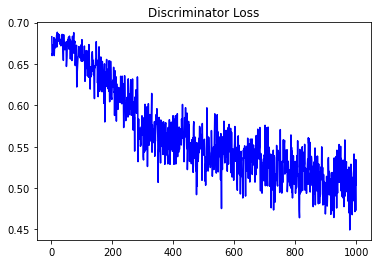

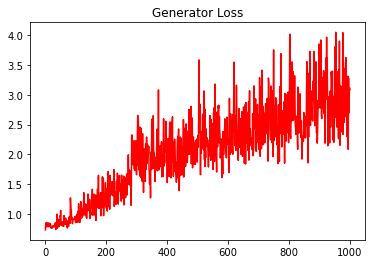

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.2186005929329857


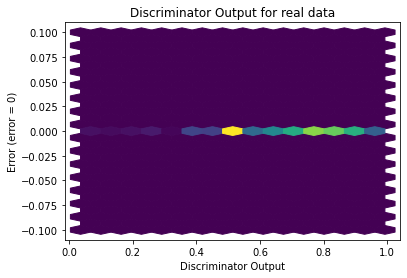

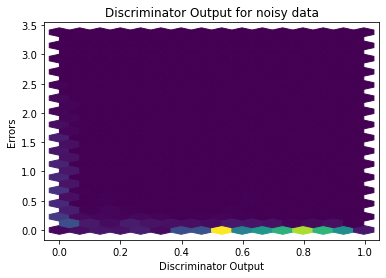

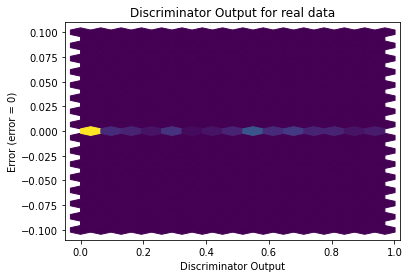

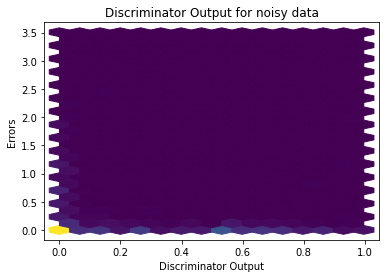

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())